## Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Описание данных games.csv

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (от 0 до 100)
* User_Score — оценка пользователей (от 0 до 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Содержание
<a href="#1">Шаг 1 - Импорт библиотек</a><br>
<a href="#2">Шаг 2 - Подготовьте данные</a><br>
<a href="#4">Шаг 3 - Исследовательский анализ данных</a><br>
<a href="#5">Шаг 4 - Портрет пользователя</a><br>
<a href="#7">Шаг 5 - Проверка гипотез</a><br>
<a href="#8">Шаг 6 - Общий вывод</a>


# <a name=1> Шаг 1 — Импорт библиотек</a>

In [1]:
# импортирую библиотеки
# вызов библиотеки pandas
import pandas as pd
# импорт библиотеки matplotlib
import matplotlib.pyplot as plt
# импорт библиотеки numpy
import numpy as np
# импорт библиотеки seaborn
import seaborn as sns
# импорт библиотеки scipy
from scipy import stats as st
import scipy
# импорт библиотеки warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
games = pd.read_csv('https://raw.githubusercontent.com/trisha00001/file/main/games.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**В наборе есть пропуски. Нет искажений, хотя есть нулевые значения. Проведем предобработку данных**

# <a name=2 >Шаг 2 — Подготовьте данные</a>

Замените названия столбцов (приведите к нижнему регистру)

In [5]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

In [7]:
MissingValue = games.isnull().sum().sort_values(ascending = False)
Percent = (games.isnull().sum()/games.isnull().count()*100).sort_values(ascending = False)
MissingData = pd.concat([MissingValue, Percent], axis=1, keys=['MissingValue', 'Percent'])
MissingData

,MissingValue,Percent
critic_score,8578,51.319174
rating,6766,40.478612
user_score,6701,40.089740
year_of_release,269,1.609333
name,2,0.011965
genre,2,0.011965
platform,0,0.000000
jp_sales,0,0.000000
eu_sales,0,0.000000
na_sales,0,0.000000


Расмотрим пропуски в столбце 'name'

In [8]:
# пропуски в столбце 'name'
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**1. Данные пропущенны только в столбцах оценок и рейтинга, поэтому удалять строки с отсутствующими в них значениями не будем.**<br>
**2.Пропуски в этих столбцах не случайны, пропуски сотвествуют почти для всех строк с отсутствующими значениями. Отсутствующие значения могут означать, что это новые игры, гры могут быть новыми, которые не успели оценить критики и пользователи.
Заполним их пустотой/Данных в этих строках практически нет, год выпуска неактуален, эти строки можно удалить без вреда для анализа**<br>
**3.Аббревиатура TBD  'To Be Determined' - 'Будет определено'. Т.е. это то же самое, что неизвестное значение. Поэтому, можно смело заменить значение 'tbd' на 'NaN'.**<br>
**4. Связь может быть с тем, что эти игры были не разрекламированы**

In [9]:
games = games.dropna(subset = ['name'])

Аналогично с жанром genre

In [10]:
games = games.dropna(subset = ['genre'])

пропуски в столбце 'year_of_release'

In [11]:

games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


удалим строки без данных в столбце 'year_of_release'

In [12]:

games = games.dropna(subset = ['year_of_release'])

In [13]:
MissingValue = games.isnull().sum().sort_values(ascending = False)
Percent = (games.isnull().sum()/games.isnull().count()*100).sort_values(ascending = False)
MissingData = pd.concat([MissingValue, Percent], axis=1, keys=['MissingValue', 'Percent'])
MissingData

,MissingValue,Percent
critic_score,8461,51.453418
rating,6676,40.598395
user_score,6605,40.166626
year_of_release,0,0.000000
platform,0,0.000000
name,0,0.000000
genre,0,0.000000
jp_sales,0,0.000000
eu_sales,0,0.000000
na_sales,0,0.000000


Рассмотрим уникальные значения этих слобцов

In [14]:
print(games['critic_score'].unique())
print()
print(games['user_score'].unique())
print()
print(games['rating'].unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


 заменяем tbd в столбце 'user_score' на NaN

In [15]:

games.loc[games['user_score']=='tbd','user_score'] = np.nan


принудительно заменяем формат столбца user_score на числовой

In [16]:

games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

**Данные пропущенны только в столбцах оценок и рейтинга, поэтому удалять строки с отсутствующими в них значениями не будем. И, да, они не случайны, пропуски сотвествуют почти для всех строк с отсутствующими значениями.**

Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [17]:
games['year_of_release'] = games['year_of_release'].astype('int')



Заменим пропущенные значения в столбце 'rating' на пустую строку

In [18]:

games['rating'] = games['rating'].fillna(value='rp')


In [19]:
games.dtypes

,0
name,object
platform,object
year_of_release,int64
genre,object
na_sales,float64
eu_sales,float64
jp_sales,float64
other_sales,float64
critic_score,float64
user_score,float64


In [20]:
# проверим на дубликаты
games.duplicated().sum()

np.int64(0)

<div class="alert alert-warning">

**df.duplicated().sum() == 0** не означает, что в данных нет дубликатов (записей).
 Попробуй найти неявные дубликаты (нужно использовать параметр **subset**). Ну а в нашем учебном проекте пробуй найти дубликаты для пары "Имя - Игровая консоль".
</div>


Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [21]:
games['sum_sales'] = games.apply(lambda row: sum(row[['na_sales','eu_sales','jp_sales','other_sales']]),axis =1)

In [22]:
MissingValue = games.isnull().sum().sort_values(ascending = False)
Percent = (games.isnull().sum()/games.isnull().count()*100).sort_values(ascending = False)
MissingData = pd.concat([MissingValue, Percent], axis=1, keys=['MissingValue', 'Percent'])
MissingData

,MissingValue,Percent
user_score,8981,54.615665
critic_score,8461,51.453418
name,0,0.000000
platform,0,0.000000
genre,0,0.000000
year_of_release,0,0.000000
na_sales,0,0.000000
eu_sales,0,0.000000
other_sales,0,0.000000
jp_sales,0,0.000000


**Вывод:**

Мы подготовили данные к анализу:
- Заменили названия столбцов (привели к нижнему регистру);
- Преобразовали данные в нужные типы:
    - в столбце 'year_of_release' данные в формате `int`;
    - в столбце 'user_score' данные в формате `float`;
- Обработали пропуски, удалив всего 2% некритичных данных;

Заполнять пропуски в столбцах `critic_score`, `user_score` и `rating` некорректно, т.к. в этом случае мы получим неточные результаты статистического анализа. Удаление строк с пропущенными значениями не было выполнено, при обработке зависимостей в данных столбцах этот факт будет учтен.

- Суммарные продажи во всех регионах записаны в отдельный столбец.

Можно переходить к исследовательскому анализу данных.

# <a name=4> Шаг 3 — Исследовательский анализ данных</a>

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [23]:
games.groupby('year_of_release')['name'].count()

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Text(0.5, 0, 'Год')

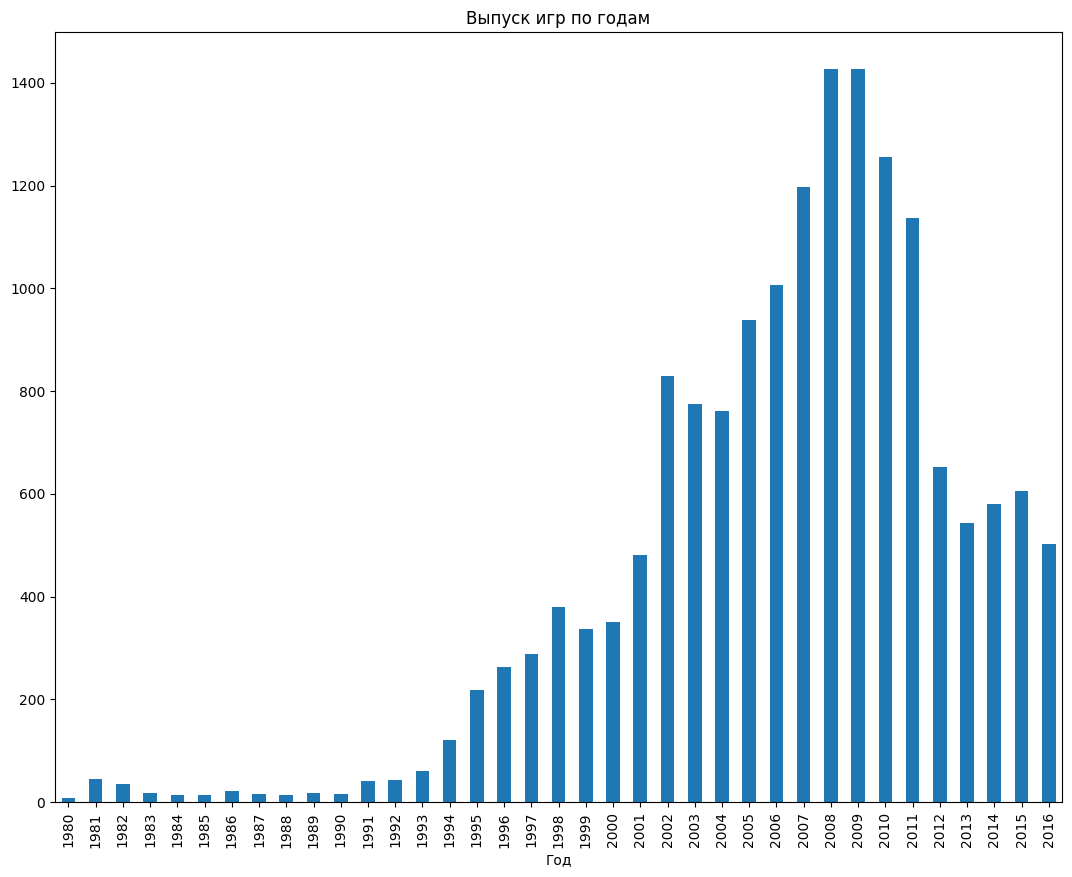

In [24]:
games.groupby('year_of_release')['name'].count().plot(kind = 'bar', title = 'Выпуск игр по годам', figsize=(13, 10))
plt.xlabel("Год")

**Количество выпускаемых игр с 1980 (9 игр) по 2008 (1427 игр) стремительно увеличивалось, с 2009 (1426 игр) пошло на спад (в 2016 году выпущено 502 игры). Скорее всего это связано с появлением смартфонов и ростом популярности соцсетей. Разработчикам и производителям игр пришлось перестраиваться с учетом новых возможностей, создавая игровые платформы нового поколения.**


Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?



In [25]:
g = games.groupby(by='platform').agg({'sum_sales':'sum'}).sort_values(by='sum_sales', ascending=False).head()
g

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


Text(0.5, 0, 'платформа')

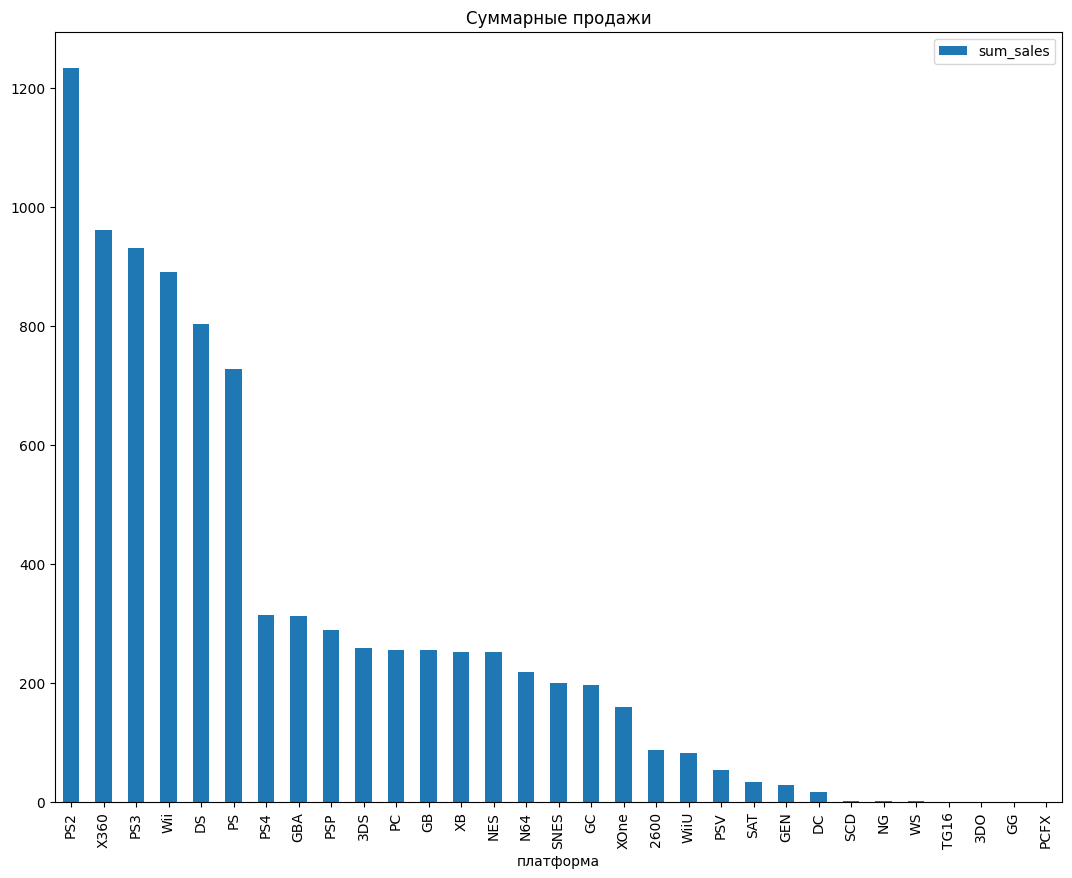

In [26]:
games.groupby(by='platform').agg({'sum_sales':'sum'}).sort_values(by='sum_sales', ascending=False).plot(kind = 'bar', title = 'Суммарные продажи', figsize=(13, 10))
plt.xlabel("платформа")

**Вывод:** Наиболее популярны платформы: PS2, X360, PS3, Wii, DS.
У пятерки наиболее популярных платформ примерно равная доля рынка на уровне 18-
19%, насколько большая доля рынка у платформы PS2 - 26%

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.


Text(0.5, 1.0, 'Wii')

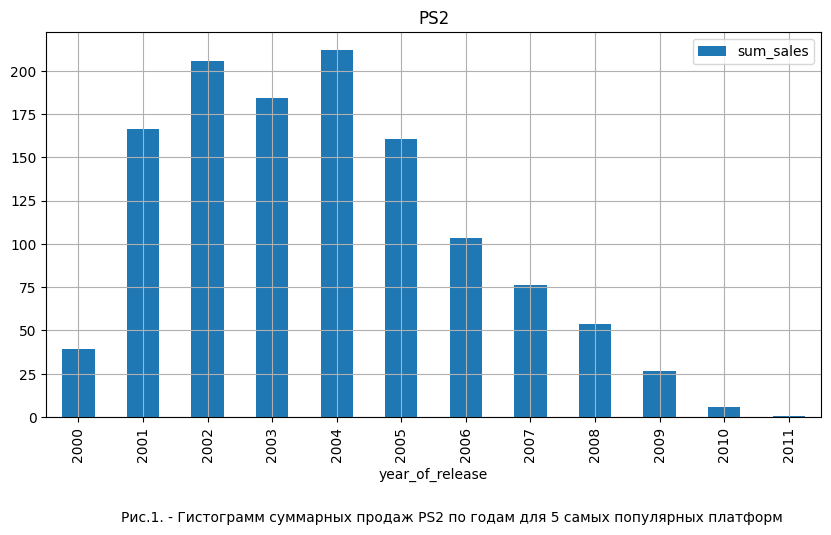

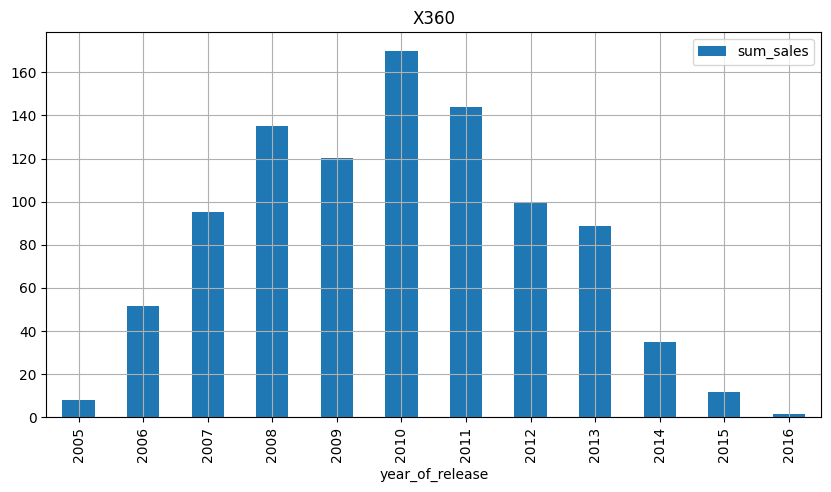

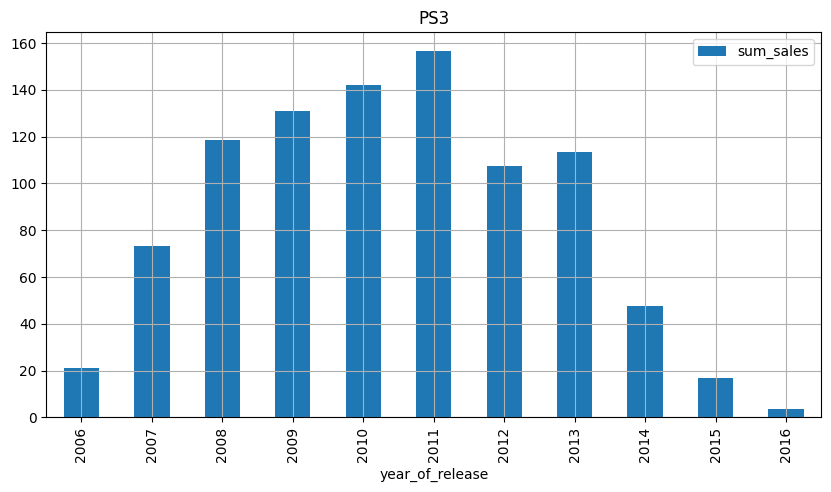

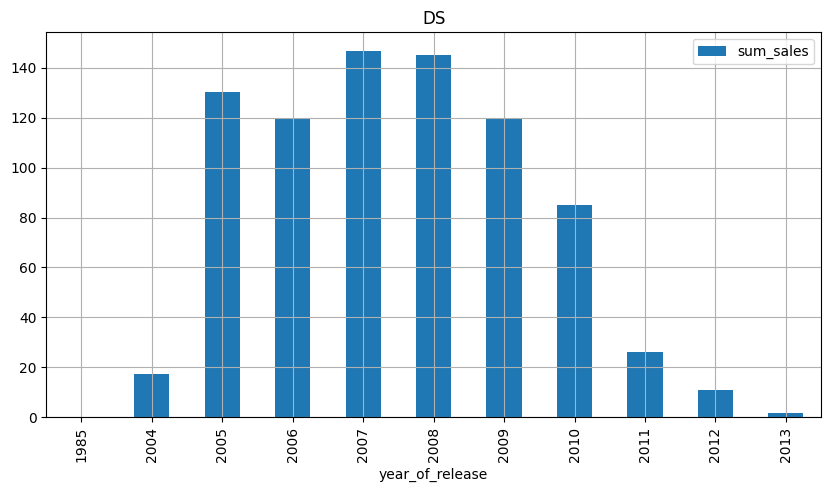

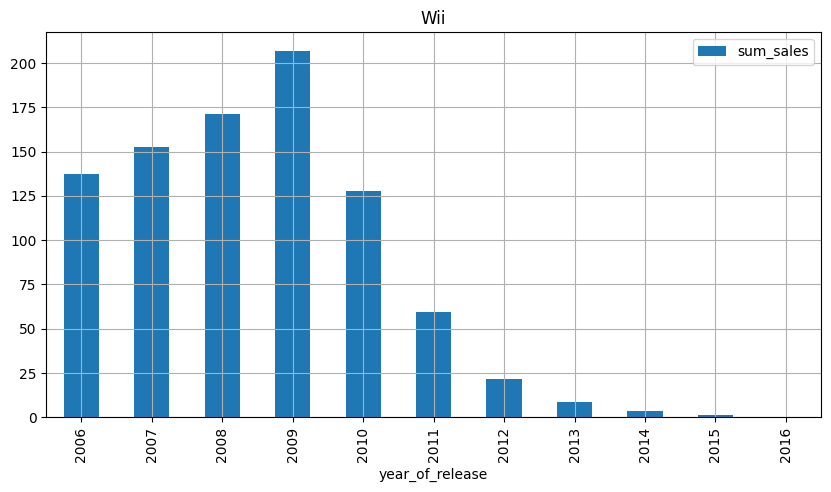

In [27]:
# создание гистограмм суммарных продаж по годам для 5 самых популярных платформ.
(games
    .query('platform=="PS2"')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('PS2') # присвоение заголовка гистограмме
plt.figtext(0.2, -0.1, "Рис.1. - Гистограмм суммарных продаж PS2 по годам для 5 самых популярных платформ")
(games
    .query('platform=="X360"and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('X360')
(games
    .query('platform=="PS3"and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('PS3')
(games
    .query('platform=="DS"and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('DS')
(games
    .query('platform=="Wii"and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('Wii')

**Вывод:**
Все платформы, которые вошли в 5-ку самых популярных появились в середине 2000-х
годов и их пик пришелся на конец 2000-х - начало 2010-х годов. Исключение составляет
платформа PS2, которая практически сразу после появления в 2000 году набрала
популярность и достигла своего пика к 2004 году, когда начали появляться остальная
рассмотренная выше 4-ка платформ. Это все напоминает модель диффузии инноваций, где
PS2 выступила в качестве "новатора", а остальная 4-ка в качестве ранних последователей.
Всплек продаж в конце на рубеже 2000-2010 годов объясняется присоединением
большего количества участников - "раннего большинства", а потом и "позднего
большинства" (терминология использована из самой модели)

На рисунке наглядно продемонстрировано, что в 2010-2015 годах ТОП-5 платформ
владеют почти 80% мирового рынка, а на долю остальных 7 платформ приходится 20%
рынка. Из пятерки лидеров предыдущего десятилетия, на которое пришелся пик продаж,
сохранили лидерство только две платформы - PS3 и X360. На их долю приходится почти
треть мирового рынка игровых платформ. Это наглядно демонстрирует падение рынка
игровых платформ, характеризующееся появлением большего количества участников,
размытием доли каждого из них и общим падением объемов продаж.


Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.

In [28]:
ps2=games.query('platform=="PS2"')
ps2_min=ps2['year_of_release'].min()
ps2_max=ps2['year_of_release'].max()
ps2_diff=ps2_max-ps2_min

In [29]:
x360=games.query('platform=="X360"')
x360_min=x360['year_of_release'].min()
x360_max=x360['year_of_release'].max()
x360_diff=x360_max-x360_min


In [30]:
ps3=games.query('platform=="PS3"')
ps3_min=ps3['year_of_release'].min()
ps3_max=ps3['year_of_release'].max()
ps3_diff=ps3_max-ps3_min

In [31]:
ds=games.query('platform=="DS"')
ds_min=ds['year_of_release'].min()
ds_max=ds['year_of_release'].max()
ds_diff=ds_max-ds_min


In [32]:
wii=games.query('platform=="Wii"')
wii_min=wii['year_of_release'].min()
wii_max=wii['year_of_release'].max()
wii_diff=wii_max-wii_min

In [33]:
mean = np.median([ps2_diff,x360_diff,ps3_diff,ds_diff,wii_diff])
print(mean)


11.0


**Вывод:**
В среднем, платформы существуют 11 лет. Значение рассчитано как медианна. У
платформы DS2 "срок жизни" в 2.5 раза больше, чем у остальных. При этом, как было
показано выше, на рисунках 5 - 9, пика популярности платформы достигают через 4-5 лет
после появления.

А вообще, анализировать и сравнивать "сроки" жизни не корректно. Они ничего, по сути,
не означают. Решение что называть новой платформой, а что просто обновлением старой
принимается внутри компании. Ведь нельзя же утверждать, что у DS2 за почти 30 лет не
поменялось принципиально ничего, чтобы не считать выходящие приставки в это время
новой платформой. Можно предположить ошибку на этапе занесения данных, и неверное
соотнесение той или иной игры к платформе DS. В любом случае решение рассчитать
среднее как медиану в этих условиях наиболее корректно.

Актуальным периодом можно назвать промежуток между 2010 и 2016 годами.
В среднем платформы живут 10—11 лет, начиная с 2006 года новые платформы появляются каждый год, а в некоторых случаях по две за один год.

In [34]:
actual_data=games[(games.year_of_release >=2013) & (games.year_of_release <= 2016)]


В 2016 существуют платформы: PS4, 3DS, XOne, WiiU, PS3, PC, X360, PSV, Wii.

In [35]:
actual_data_pivot_table = actual_data.pivot_table(index = ['year_of_release','platform'],
                                                    values = 'sum_sales',
                                                    aggfunc = 'sum')
pivot_table_index = actual_data_pivot_table.index.to_list()


In [36]:
actual_data_pivot_table["years"] = [year for year, platform in pivot_table_index]
actual_data_pivot_table.index = [platform for year, platform in pivot_table_index]
actual_data_pivot_table.head(10)

,sum_sales,years
3DS,56.57,2013
DS,1.54,2013
PC,12.38,2013
PS3,113.25,2013
PS4,25.99,2013
PSP,3.14,2013
PSV,10.59,2013
Wii,8.59,2013
WiiU,21.65,2013
X360,88.58,2013


Визуализируем показатели продаж по годам

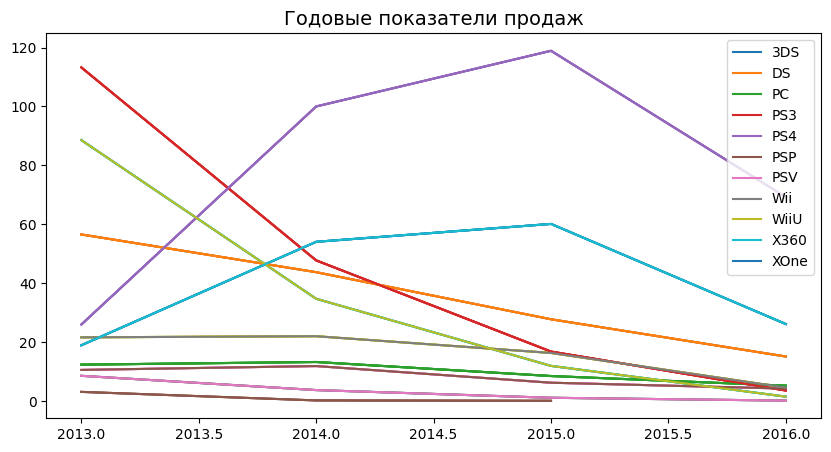

In [37]:
fig, ax = plt.subplots(figsize =(10,5))
for platform in actual_data_pivot_table.index:
    plt.title('Годовые показатели продаж', fontsize = 14)
    ax.plot(actual_data_pivot_table.loc[platform]['years'],
            actual_data_pivot_table.loc[platform]['sum_sales'])
ax.legend(actual_data_pivot_table.index.unique(),prop = {'size':10});

По графику видно, что практически все платформы находятся в стадии снижения показателя продаж. Однако можно выделить платформы ps3 и ps4, которые активно растут в первой половине актуального периода, а после 2015 года начинают сдавать позиции.
Мы наблюдаем падение продаж ps4, причиной которому стал анонс ps4 pro в 2016 году, поэтому неудивительно, что продажи PlayStation-4 упали. Потенциально прибыльными могут стать xone, wiiu и pc.

Пятерка самых популярных платформ набрала свою популярность в начале 2000-х. Период от первых продаж до исчезновения в среднем занимает 9 лет.

Поистроим графики для платформ PS4, 3DS, XOne, WiiU, PC, PSV, XB. Учтем, что в 2016 году существует платформа Х360, но в выбранных нами данных ее нет.

Text(0.5, 1.0, 'PS4')

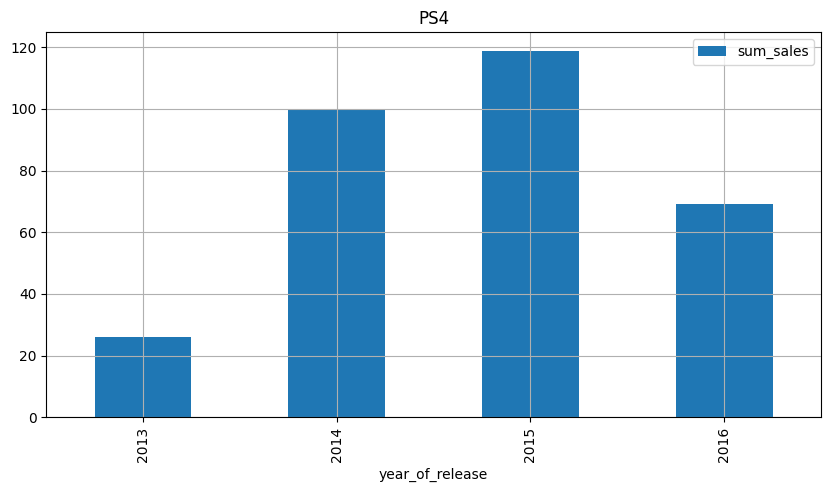

In [38]:
(actual_data
    .query('platform=="PS4"')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('PS4')

<Axes: xlabel='year_of_release'>

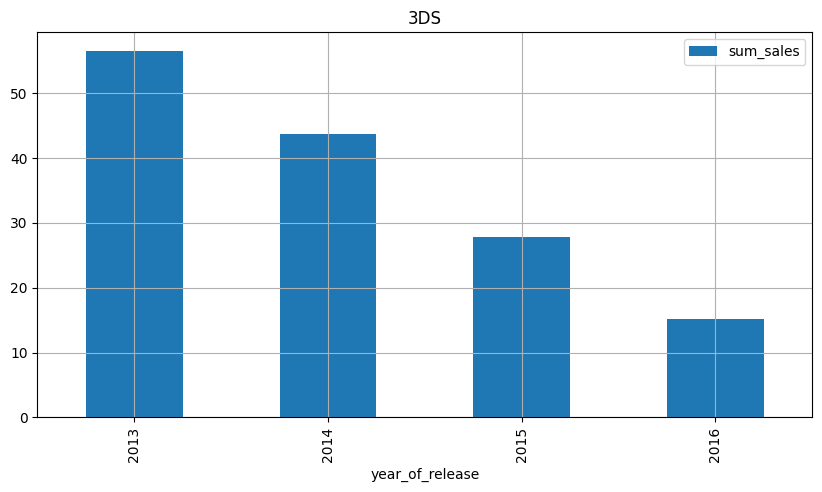

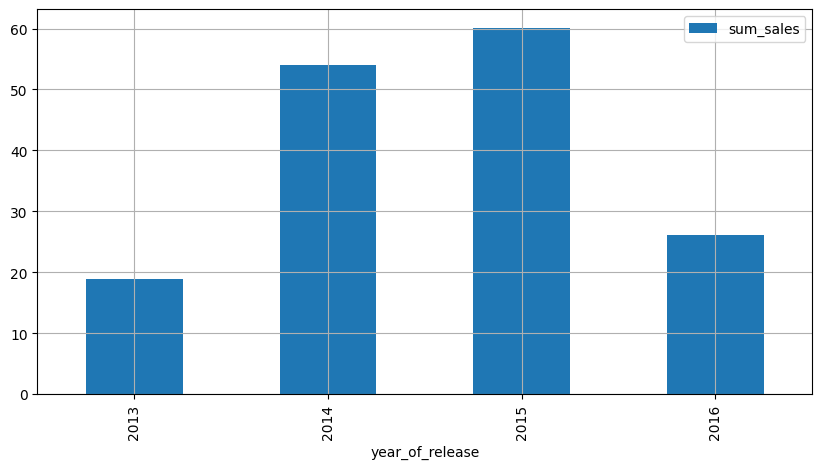

In [39]:
(actual_data
    .query('platform=="3DS"')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('3DS')
(actual_data
    .query('platform=="XOne" ')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)

Text(0.5, 1.0, 'PC')

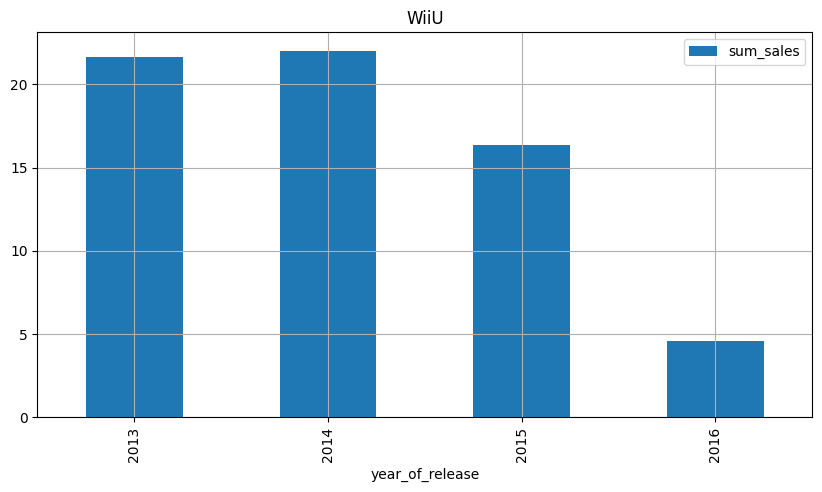

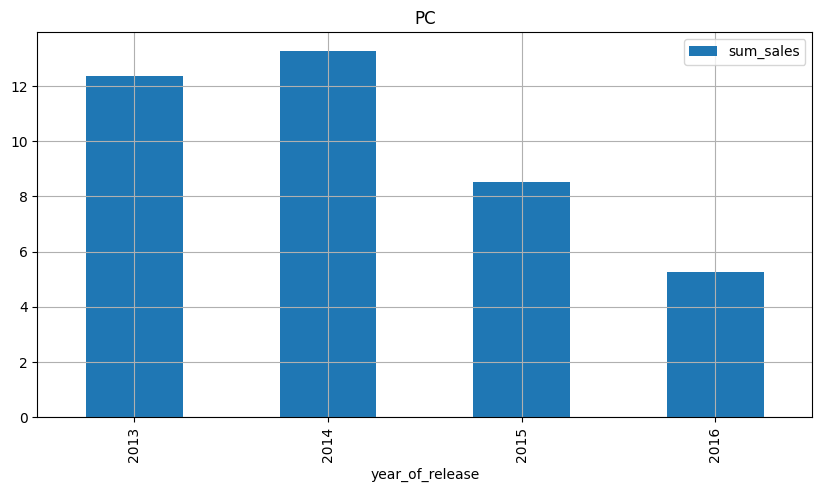

In [40]:

(actual_data
    .query('platform=="WiiU"and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('WiiU')
(actual_data
    .query('platform=="PC" and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('PC')

Text(0.5, 1.0, 'PSV')

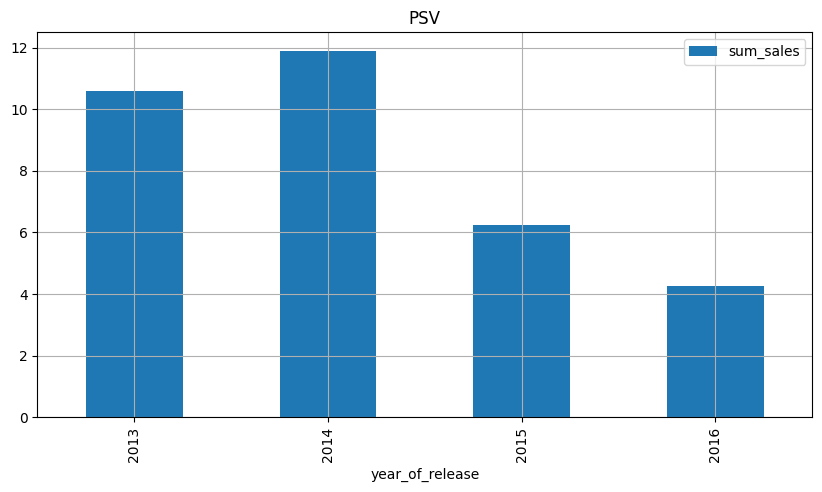

In [41]:


(actual_data
    .query('platform=="PSV" ')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('PSV')


**Вывод:** потенциально прибыльны платформы PS4, X360 и XOne, вот в них и будем

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Text(0, 0.5, 'Объем продаж млн. долл.\n')

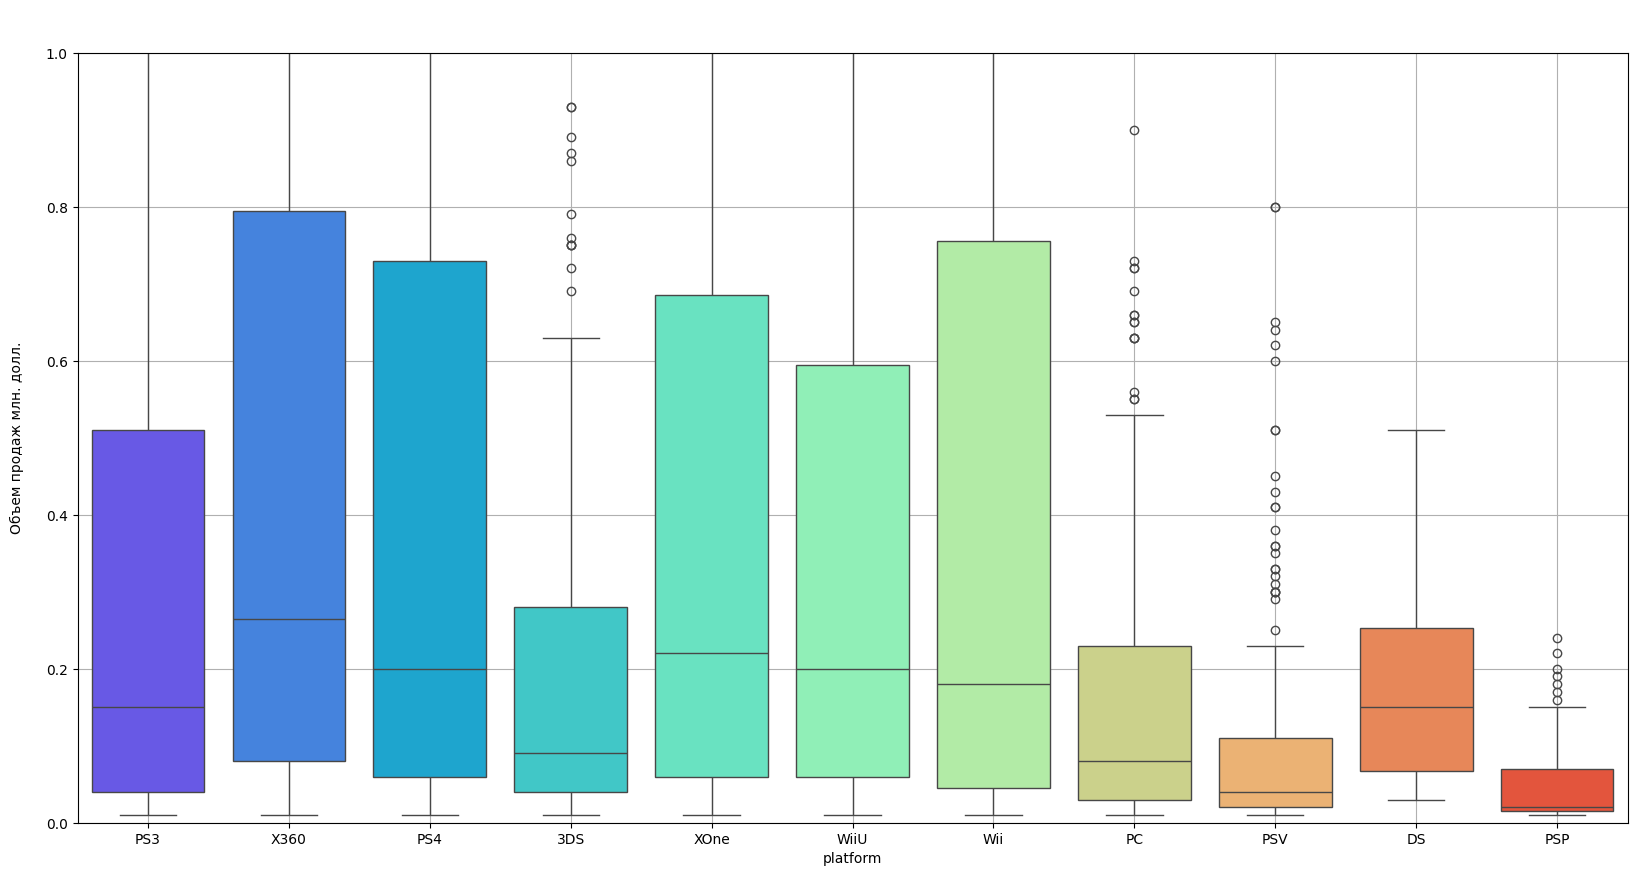

In [42]:
plt.figure(figsize=(20,10))
sns.boxplot (x = 'platform', y = 'sum_sales', data = actual_data, palette='rainbow')
plt.ylim(0,1)
plt.grid()
plt.title('\n')
plt.ylabel("Объем продаж млн. долл.\n")



**Продажи XOne и PS4 сильно выделяются на фоне остальных, что неудивительно, потому что это мастодонты рынка.**

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.


In [43]:
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,rp,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,rp,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,rp,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,rp,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,rp,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,rp,0.01


In [44]:
corr = actual_data[['critic_score', 'user_score', 'sum_sales']].corr()
corr.style.background_gradient(cmap='coolwarm')

,critic_score,user_score,sum_sales
critic_score,1.000000,0.502221,0.313700
user_score,0.502221,1.000000,-0.002608
sum_sales,0.313700,-0.002608,1.000000


**Здесь мы можем говорить об взаимосвязи рейтингов игр пользовательских и критиков.**

**critic_score и user_score зависимы.
 Посмотрим что на графиках.**

**Построим графики зависимости продаж от оценок**

In [45]:
XOne = actual_data.query('platform == "XOne"')
PS4 = actual_data.query('platform == "PS4"')
PC = actual_data.query('platform == "PC"')

In [46]:
PC_cor = PC[['critic_score','user_score', 'sum_sales']]
PC_cor.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.429562,0.196030
user_score,0.429562,1.000000,-0.093842
sum_sales,0.196030,-0.093842,1.000000


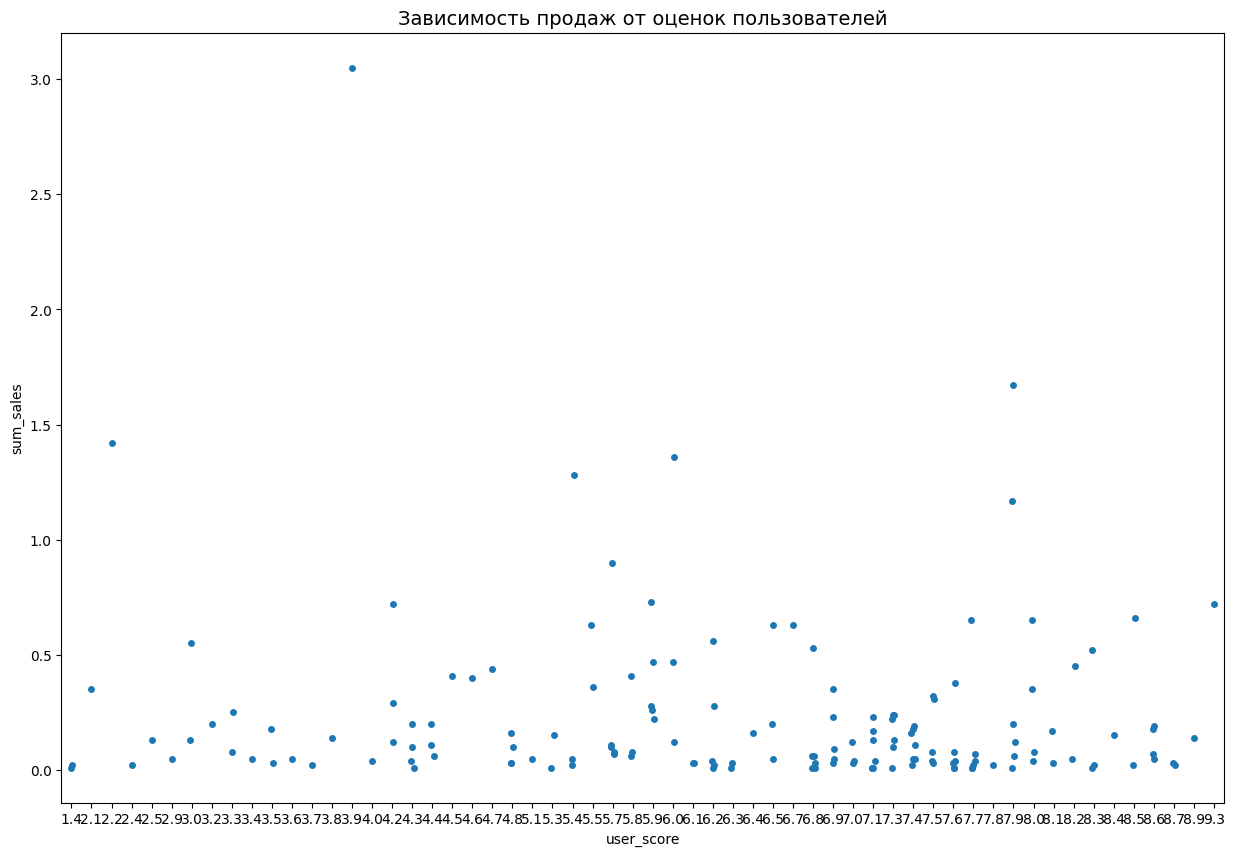

In [47]:
plt.figure(figsize=(15,10))
sns.stripplot(x="user_score", y="sum_sales", data=PC_cor, jitter=True)
plt.title('Зависимость продаж от оценок пользователей', fontsize = 14)
plt.show();

In [48]:
PS4_cor = PS4[['critic_score','user_score', 'sum_sales']]
PS4_cor.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
sum_sales,0.406568,-0.031957,1.000000


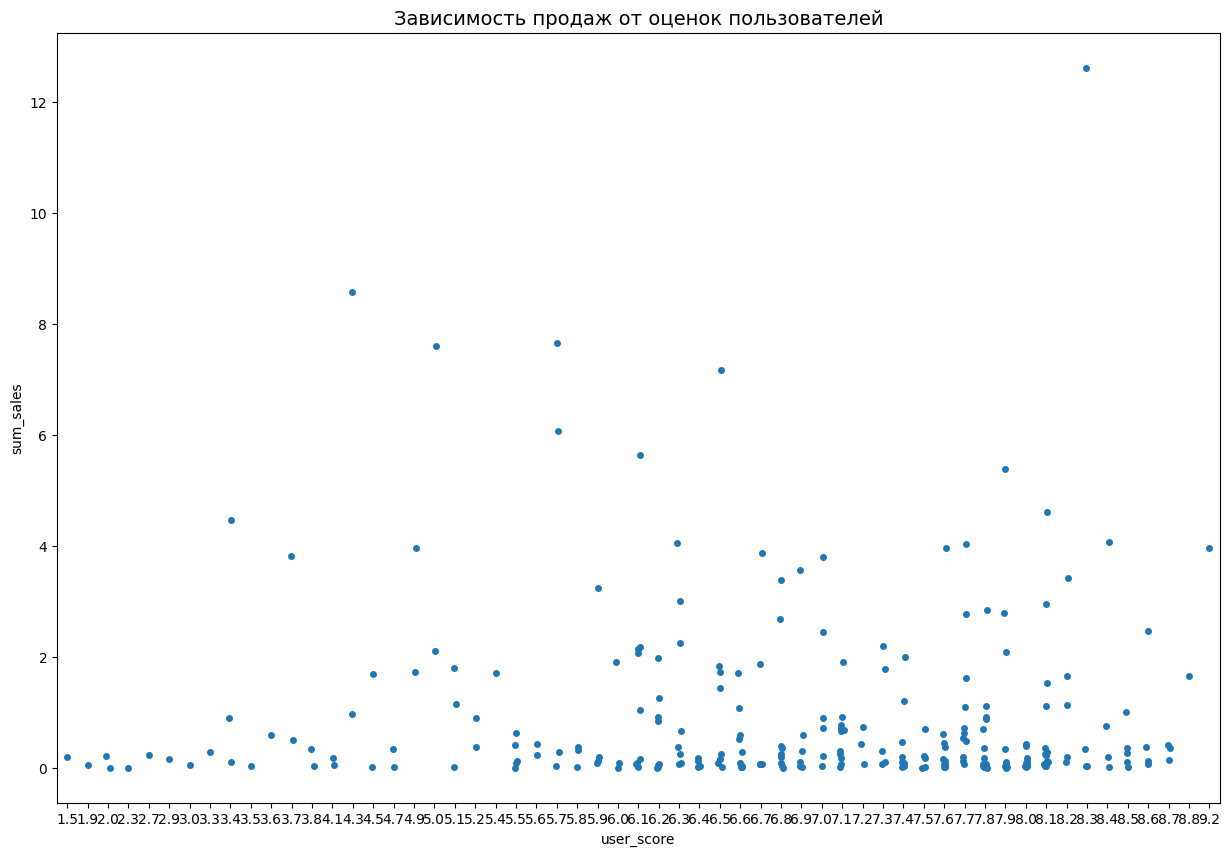

In [49]:
plt.figure(figsize=(15,10))
sns.stripplot(x="user_score", y="sum_sales", data=PS4, jitter=True)
plt.title('Зависимость продаж от оценок пользователей', fontsize = 14)
plt.show();

In [50]:
XOne_cor = XOne[['critic_score','user_score', 'sum_sales']]
XOne_cor.corr()

,critic_score,user_score,sum_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
sum_sales,0.416998,-0.068925,1.000000


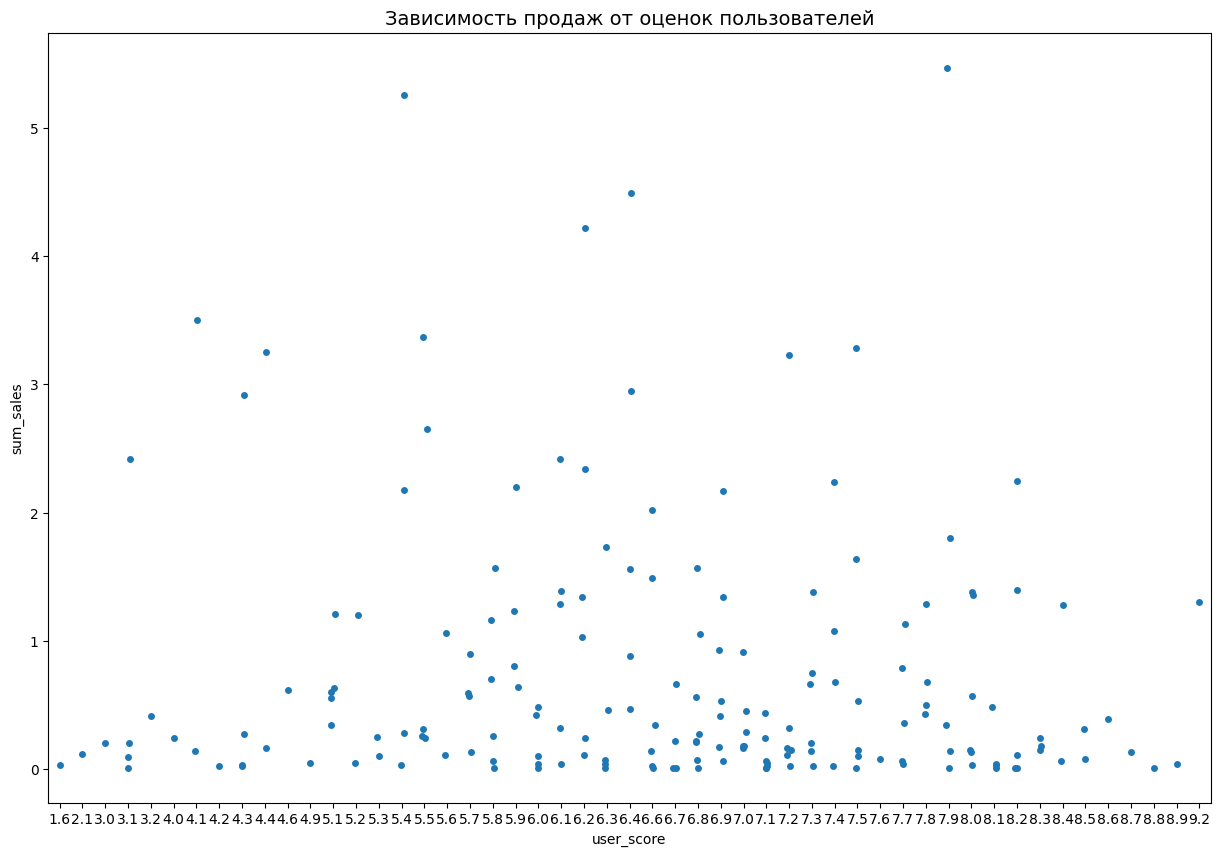

In [51]:
plt.figure(figsize=(15,10))
sns.stripplot(x="user_score", y="sum_sales", data=XOne_cor, jitter=True)
plt.title('Зависимость продаж от оценок пользователей', fontsize = 14)
plt.show();

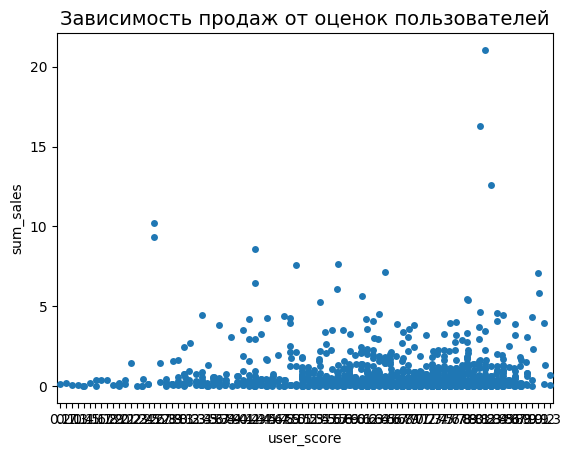

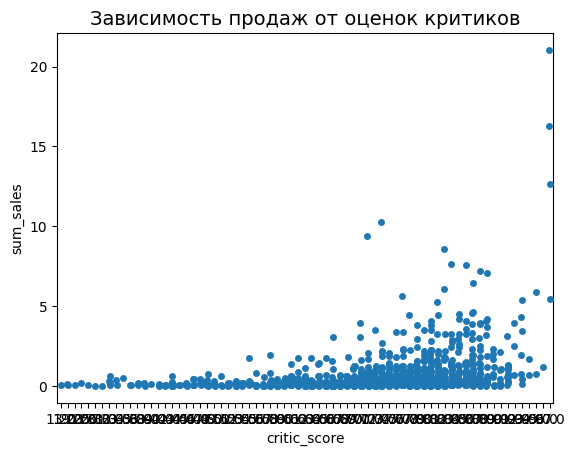

In [52]:
sns.stripplot(x="user_score", y="sum_sales", data=actual_data, jitter=True)
plt.title('Зависимость продаж от оценок пользователей', fontsize = 14)
plt.show();
sns.stripplot(x="critic_score", y="sum_sales", data=actual_data, jitter=True)
plt.title('Зависимость продаж от оценок критиков', fontsize = 14)
plt.show();

**Вывод:**
чем выше оценка, тем больше продаж, и не важно оценил игру пользователь или критик. А также самые дорогие продажи приходятся на самые высокие оценки критиков

**По платформам PC, PS4, XOne однозначно можно сказать, что оценки критиков влияют на количество продаж, а оценки пользователей не принимают во внимание.**

Соотнесите выводы с продажами игр на других платформах.

**Диаграмма рассеяния продаж для различных платформ**

Диаграмма рассеяния для PS4


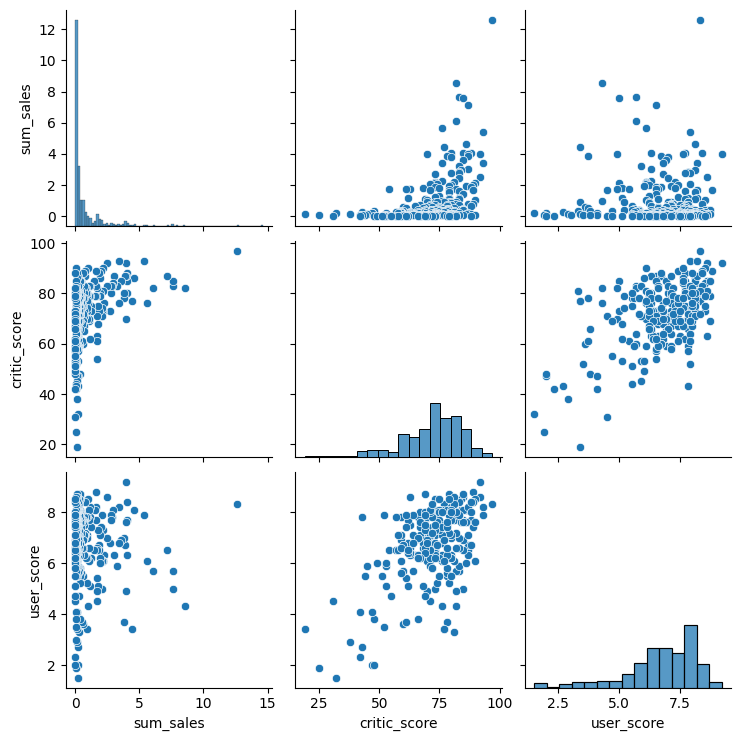

In [53]:
print("Диаграмма рассеяния для PS4")
sns.pairplot(actual_data[actual_data.platform == "PS4"][['sum_sales', 'critic_score', 'user_score']])
plt.show()

In [54]:
print("Матрица корреляций")
actual_data[actual_data.platform == "PS4"][['sum_sales', 'critic_score', 'user_score']].corr()


Матрица корреляций


,sum_sales,critic_score,user_score
sum_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Диаграмма рассеяния для XOne


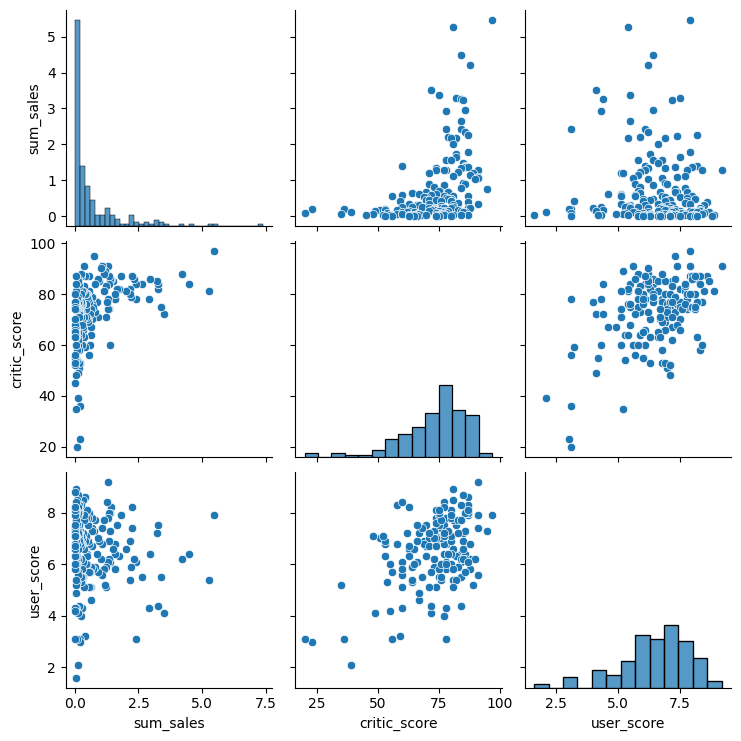

In [55]:
print("Диаграмма рассеяния для XOne")
sns.pairplot(actual_data[actual_data.platform == "XOne"][['sum_sales', 'critic_score', 'user_score']])
plt.show()

In [56]:
print("Матрица корреляций")
actual_data[actual_data.platform == "XOne"][['sum_sales', 'critic_score', 'user_score']].corr()


Матрица корреляций


,sum_sales,critic_score,user_score
sum_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


**В целом видим закономерную картину, чем лучше рейтинг, тем игра лучше, следовательно больше продаж, но можно заметить, что в столбце user_score есть игры, которые имеют высокую оценку пользователей, но при этом были проданы в небольшом количестве.**


<Axes: >

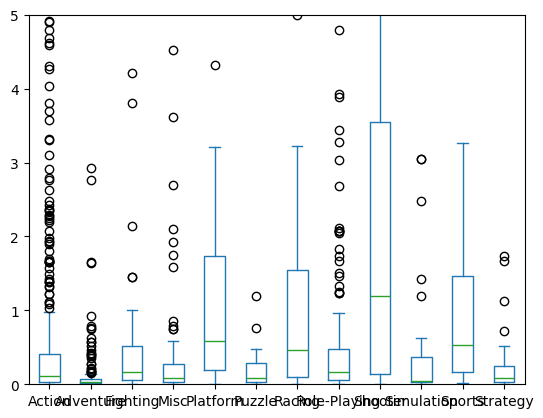

In [57]:

actual_data.pivot_table(index = 'name', columns = 'genre', values = 'sum_sales', aggfunc = 'sum').plot(kind='box',ylim=(0,5))


Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [58]:
print(actual_data.groupby(by='genre').agg({'sum_sales':'sum'}).sort_values(by='sum_sales', ascending=False).head())
print(actual_data.groupby(by='genre').agg({'sum_sales':'sum'}).sort_values(by='sum_sales', ascending=False).tail())

              sum_sales
genre                  
Action           321.87
Shooter          232.98
Sports           150.65
Role-Playing     145.89
Misc              62.82
            sum_sales
genre                
Fighting        35.31
Adventure       23.64
Simulation      21.76
Strategy        10.08
Puzzle           3.17


**Наиболее популярны игры жанров экшн, спорт, шутеры, аркады и ролевые игры, те игры, в которых получаешь эмоцию от происходящего. Наименее популярны игры, в которых нужно думать или совершать однотипные действия: симуляции, бои, приключения, пазлы и стратегии. Связано это еще и с ценой на игры, производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр.**

In [59]:
genre_analysis_pivot_table = actual_data.groupby('genre').agg({'name':'count','sum_sales':['median','sum']})
genre_analysis_pivot_table.columns = ['count', 'median','sum']
genre_analysis_pivot_table = genre_analysis_pivot_table.sort_values(by = 'sum', ascending = False)

In [60]:
genre_analysis_pivot_table

,count,median,sum
genre,,,
Action,766,0.110,321.87
Shooter,187,0.450,232.98
Sports,214,0.240,150.65
Role-Playing,292,0.125,145.89
Misc,155,0.100,62.82
Platform,74,0.225,42.63
Racing,85,0.120,39.89
Fighting,80,0.125,35.31
Adventure,245,0.030,23.64


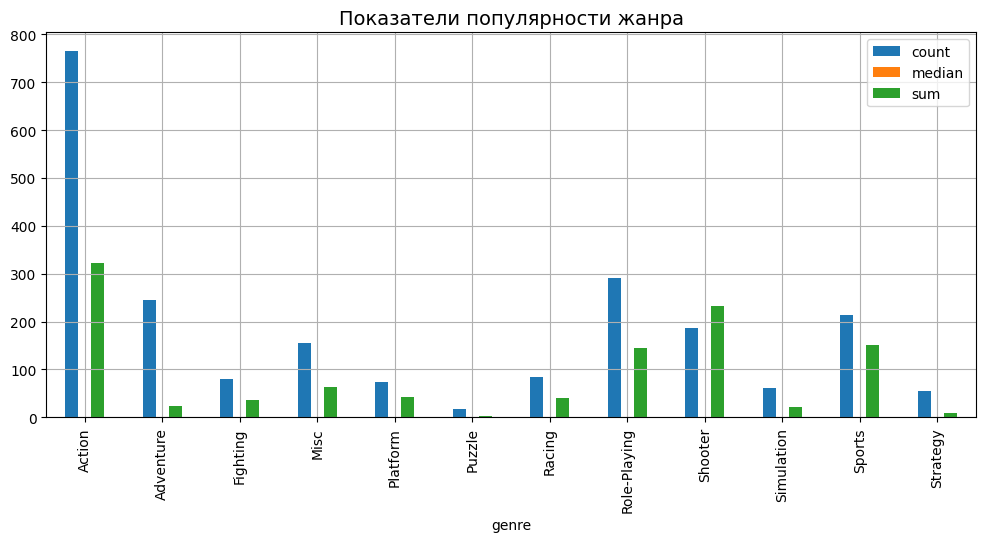

In [61]:
genre_analysis_pivot_table.groupby('genre').sum().plot(grid=True, kind='bar',figsize=(12,5))
plt.title('Показатели популярности жанра', fontsize=14);

**По сформированной сводной таблице видно, что количество игр жанра не всегда гарантирует хорошие продажи. Например, в жанре adventure выпущено много игр. Существуют и обратные случаи, когда медианное значение продаж приближается к максимальному среди всех жанров, но количество игр невелико, например, жанр simulation. Если рассматривать только самые прибыльные жанры, то можно заметить, что в них сочетаются два параметра: много игр и высокое медианное значение.**


# <a name=5> Шаг 4 — Портрет пользователя каждого региона</a>

Определите для пользователя каждого региона (NA, EU, JP):


Для того, чтобы описать геймеров Северной Америки, Европы и Японии, нужно понять, какие приставки популярны в этих регионах, какие жанры привлекательнее всего при покупке, а также определить примерный возраст играющих исходя из рейтинга ESBR.

Определим топ-5 популярных платформ в разных регионах мира исходя из уровня продаж:

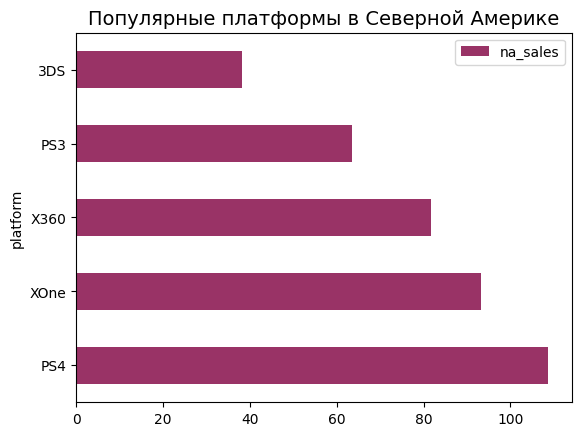

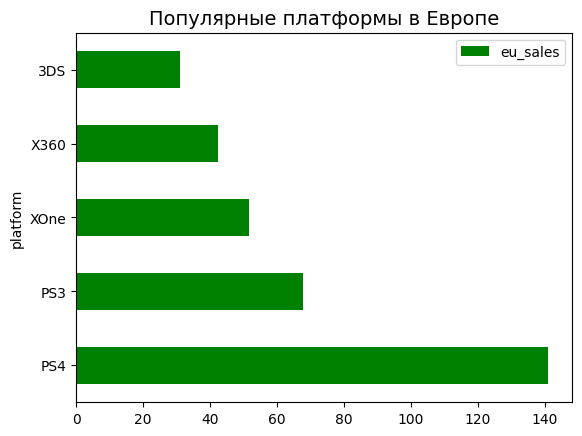

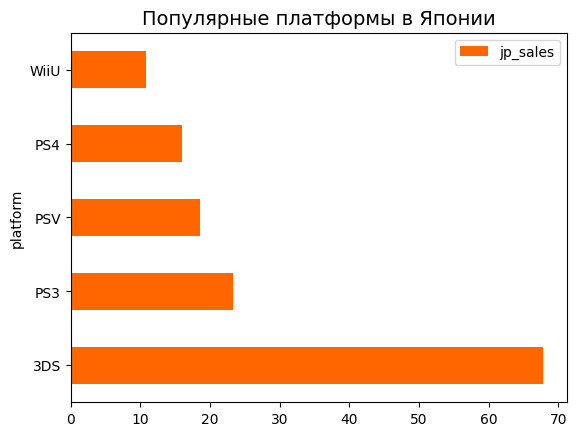

In [62]:
actual_data.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='barh', color='#993366')
plt.title('Популярные платформы в Северной Америке', fontsize=14)
actual_data.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='barh', color='#008000')
plt.title('Популярные платформы в Европе', fontsize=14)
actual_data.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='barh', color='#FF6600')
plt.title('Популярные платформы в Японии', fontsize=14);

**В Северной Америке самая популярная платформа - X360.<br>
В Европе самая популярная платформа - PS3.<br>
В Японии самая популярная платформа - DS.<br>**

**Во всех трех регионах в топ-5 платформ входят PS2 и PS3.**

In [63]:
rating_pivot_table = actual_data.pivot_table(index = 'platform', values = ['na_sales','jp_sales','eu_sales'], aggfunc = ['sum'])

In [64]:
rating_pivot_table.columns = ['na_sales','jp_sales','eu_sales']

In [65]:
top5_na = rating_pivot_table.sort_values(by = 'na_sales', ascending = False).index[:5]
top5_eu = rating_pivot_table.sort_values(by = 'eu_sales', ascending = False).index[:5]
top5_jp = rating_pivot_table.sort_values(by = 'jp_sales', ascending = False).index[:5]

Обобщим данные сводной таблицы:

In [66]:
list_of_top = [top5_eu,top5_jp,top5_na]
for count,top in enumerate(list_of_top):
    if count == 0:
        print('Топ платформ для стран Европы:',*top)
    elif count == 1:
        print('---------------------------------------------------------')
        print('Топ платформ для японского региона:',*top)
    elif count == 2:
        print('---------------------------------------------------------')
        print('Топ платформ для Северной Америки:',*top)
    print()
    for platform in top:
        data = rating_pivot_table.loc[platform,['na_sales','jp_sales','eu_sales']]
        if count == 0:
            part = data['eu_sales']
        elif count == 1:
            part = data['jp_sales']
        elif count == 2:
            part = data['na_sales']
        ratio = part / sum(data)
        print('Для платформы {} '.format(platform), end='')
        print('доля продаж: {}'.format(ratio))

Топ платформ для стран Европы: PS4 XOne X360 PS3 3DS

Для платформы PS4 доля продаж: 0.40911998194062976
Для платформы XOne доля продаж: 0.6419855222337125
Для платформы X360 доля продаж: 0.6549041623225599
Для платформы PS3 доля продаж: 0.4105780421569895
Для платформы 3DS доля продаж: 0.2788931882894064
---------------------------------------------------------
Топ платформ для японского региона: 3DS PS3 PSV PS4 WiiU

Для платформы 3DS доля продаж: 0.4950719135577133
Для платформы PS3 доля продаж: 0.15097633518686152
Для платформы PSV доля продаж: 0.6252943155062227
Для платформы PS4 доля продаж: 0.060047405846721094
Для платформы WiiU доля продаж: 0.18151484818151484
---------------------------------------------------------
Топ платформ для Северной Америки: PS4 PS3 XOne X360 3DS

Для платформы PS4 доля продаж: 0.5308326122126491
Для платформы PS3 доля продаж: 0.438445622656149
Для платформы XOne доля продаж: 0.3556704584625991
Для платформы X360 доля продаж: 0.3410056941214212
Для п

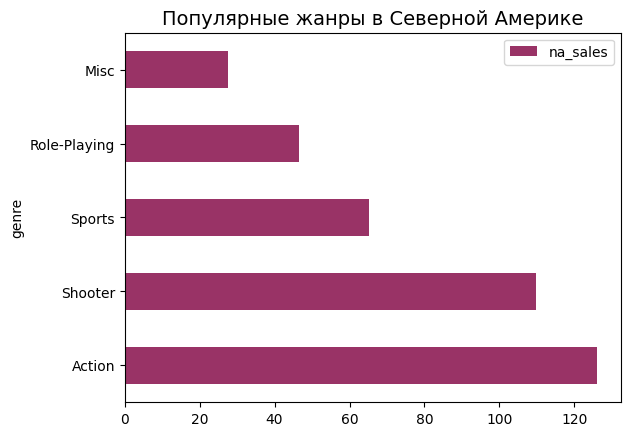

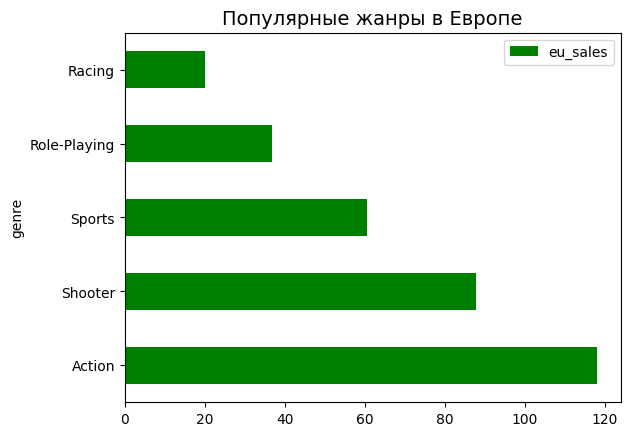

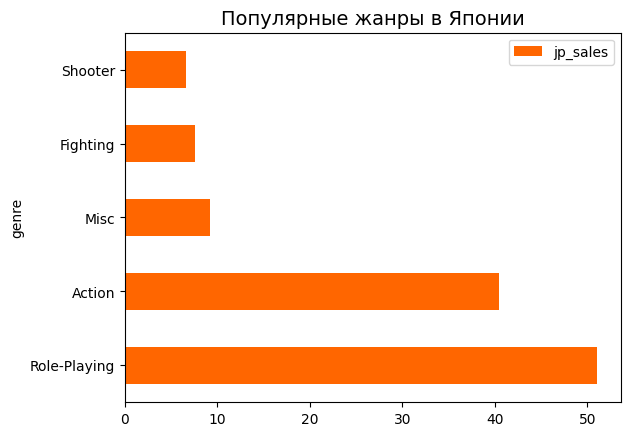

In [67]:
actual_data.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='barh', color='#993366')
plt.title('Популярные жанры в Северной Америке', fontsize=14)
actual_data.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='barh', color='#008000')
plt.title('Популярные жанры в Европе', fontsize=14)
actual_data.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='barh', color='#FF6600')
plt.title('Популярные жанры в Японии', fontsize=14);

**Вывод:**
Если рассматривать общие продажи, то наиболее популярны игры таких жанров как:
Action, Shooter и Role-Playing. Они приносят более 60% в общемировой выручке.
Для Европы и Северной Америки популярны игры типа Action, Shooter и Sports, причем
относительные доли этих жанров совпадают для двух регионов с точностью 1-2% и
занимают более 60% рынка игр. Для Японии ситуация несколько иная - лидер RolePlaying, затем Action и на третьем месте по популярности игры, для которых трудно
однозначно определить жанр - Miscellaneous (Прочее). Эта тройка жанров также занимает
долю более 60%

Наименее популярные жанры игр во всех регионах - Strategy и Puzzle.

Несколько отличные предпочтения в Японии к жанрам скорее всего объясняются
различиями в менталитете и культурных кодах.


**Влияние рейтинга ESRB на продажи**


**Entertainment Software Rating Board (ESRB)** — негосударственная организация, основное
направление деятельности — принятие и определение рейтингов для компьютерных
видеоигр и другого развлекательного программного обеспечения в США и Канаде.

Градация оценок:
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»


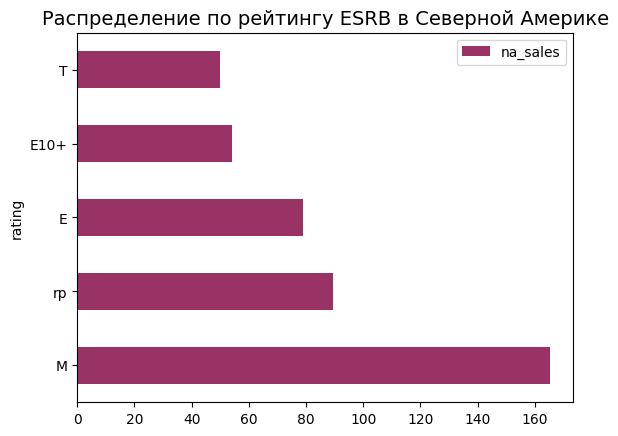

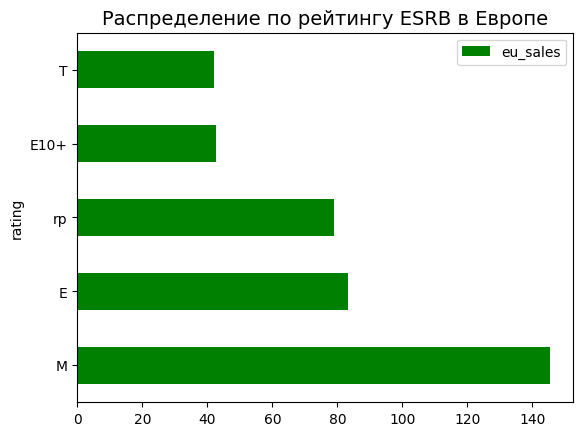

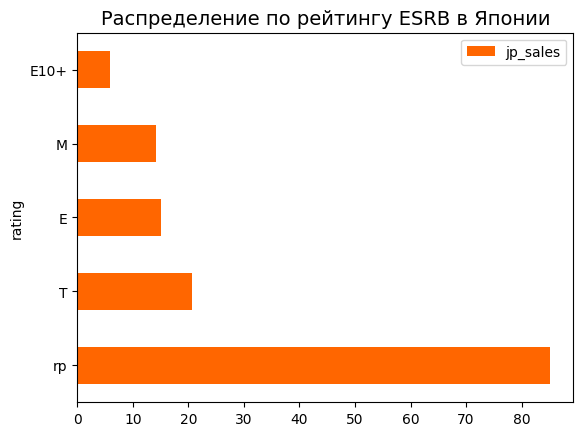

In [68]:
actual_data.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='barh', color='#993366')
plt.title('Распределение по рейтингу ESRB в Северной Америке', fontsize=14)
actual_data.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='barh', color='#008000')
plt.title('Распределение по рейтингу ESRB в Европе', fontsize=14)
actual_data.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='barh', color='#FF6600')
plt.title('Распределение по рейтингу ESRB в Японии', fontsize=14);

**Вывод:**
В Северной Америке и Европе наиболее популярны игры с рейтингом «Для всех» и «Для
взрослых», а такие жанры как «Подросткам», «Для всех от 10 лет и старше»
практически схожу популярность.

Стоит отметить что делать выводы по Японии некорректно, так как сама ESRB занимается
оценками игр для США и Канады, в Японии есть своя организация CERO (Computer Entertainment Rating Organization) и своей градацией оценок. Отчасти и для Европы делать
какие-либо выводы по этим данным некорректно, так как и в этом регионе есть своя
аналогичная организация - Pan European Game Information (PEGI).

**Вывод:
В Северной Америке, Европе и Японии популярны одни и те же жанры, но при этом отличаются предпочтения игровых платформ у японских геймеров.**

**Продажи в Северной Америке намного превышают продажи в Японии. Возможно, это связано с менталитетом: японцы берегут не только пространство в своих домах, но и выделяют меньше средств на такого рода развлечения.**

**Отслеживается зависимость от рейтинга ESRB во всех трех регионах. Наиболее популярны игры с рейтингом "Для всех", "Подросткам", "Детям старше 10 лет" и "Для взрослых"(в Европе и Северной Америке спрос на них выше, японцы больше предпочитают игры без определенного рейтинга).**

# <a name=7> Шаг 5 — Исследование статистических показателей</a>

**Гипотеза 1**<br>
**Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<br>
**Альтернативная гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [69]:
xbox = actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'] > 0)]['user_score']
pc = actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'] > 0)]['user_score']

In [70]:
xbox.mean()

np.float64(6.521428571428572)

In [71]:
pc.mean()

np.float64(6.2696774193548395)

In [72]:
l, pl = st.levene(xbox,pc)
alpha = 0.05

print(pl)

if (pl< alpha):
    print("Дисперсии одинаковы")
else:
    print("Дисперсии различны")

0.003897553110130418
Дисперсии одинаковы


/tmp/ipython-input-73-1300815899.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xbox, color='b')


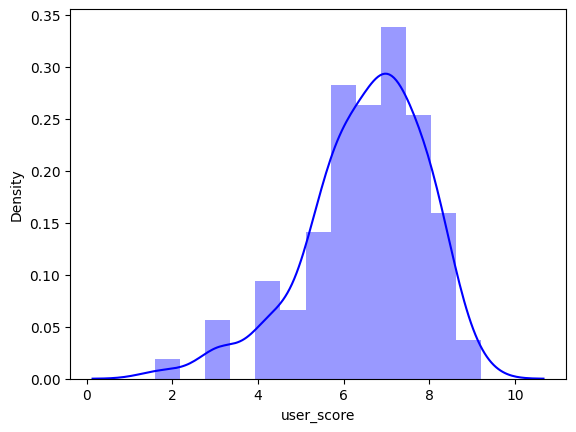

/tmp/ipython-input-73-1300815899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pc, color='y')


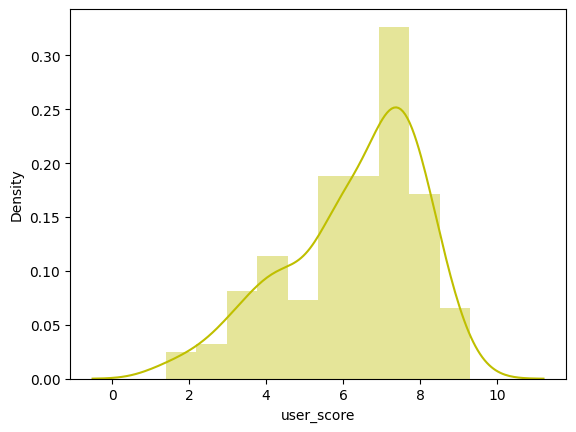

In [73]:
sns.distplot(xbox, color='b')
plt.show()
sns.distplot(pc, color='y')
plt.show()

При проверке гипотезы о среднем выборки в качестве статистического критерия часто применяется t-критерий Стьюдента, однако следует помнить, что этот критерий применим лишь тогда, когда данные выборки подчиняются нормальному закону распределения.

Распределение гауссовское, используем t-критерий Стьюдента для независимых выборок, дисперсия выборок не равна. Для наглядности наложим гистограммы одну на другую:

/tmp/ipython-input-74-758357425.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xbox, color='b')
/tmp/ipython-input-74-758357425.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pc, color='y')


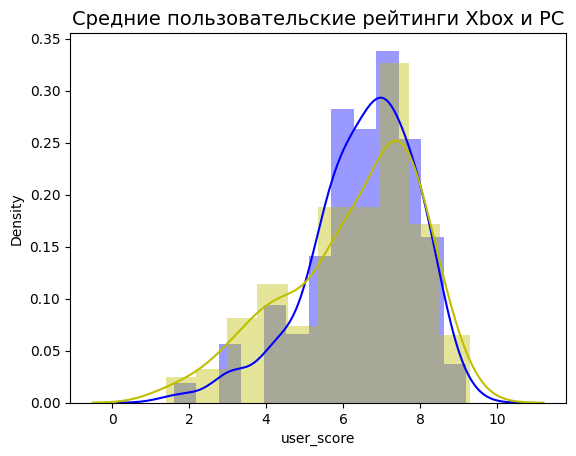

In [74]:
sns.distplot(xbox, color='b')
sns.distplot(pc, color='y')
plt.title('Средние пользовательские рейтинги Xbox и PC', fontsize=14);

In [75]:
results = scipy.stats.ttest_ind(xbox, pc)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отклоняем нулевую гипотезу")
else:
    print("Не получилось отклонить нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отклонить нулевую гипотезу


Дисперсии не равны, но они отличаются меньше чем на 5%, поэтому установим equal_var=True. Нулевая гипотеза не подтвердилась. Можем сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы. Наложение гистограмм также подтверждает отличие средних пользовательских рейтингов платформ Xbox One и PC.

**Гипотеза 2**<br>
**Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports одинаковые<br>
**Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action и Sports разные

In [76]:
alpha = .05
action = actual_data[(actual_data['genre'] == 'Action') & (actual_data['user_score'] > 0)]['user_score']
sports = actual_data[(actual_data['genre'] == 'Sports') & (actual_data['user_score'] > 0)]['user_score']
value,p = st.normaltest(action)
if p <0.05:
    print('распренделено нормально')
else:
     print('распренделено НЕ нормально')

распренделено нормально


In [77]:
action.mean()

np.float64(6.837532133676092)

In [78]:
sports.mean()

np.float64(5.238124999999999)

In [79]:
l, pl = st.levene(action,sports)
alpha = 0.05

print(pl)

if (pl< alpha):
    print("Дисперсии одинаковы")
else:
    print("Дисперсии различны")

4.2566688218274047e-07
Дисперсии одинаковы


/tmp/ipython-input-80-3080876501.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(action, color='g')


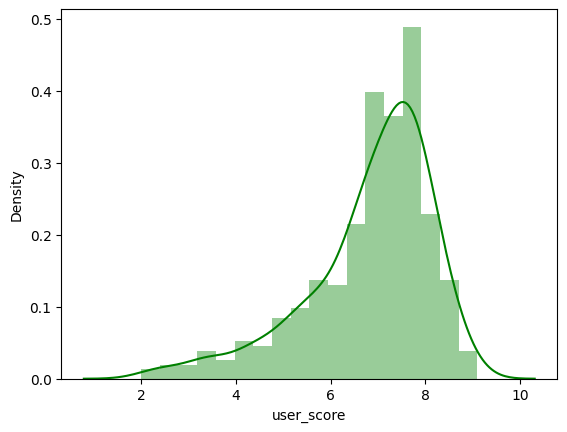

/tmp/ipython-input-80-3080876501.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sports, color='r')


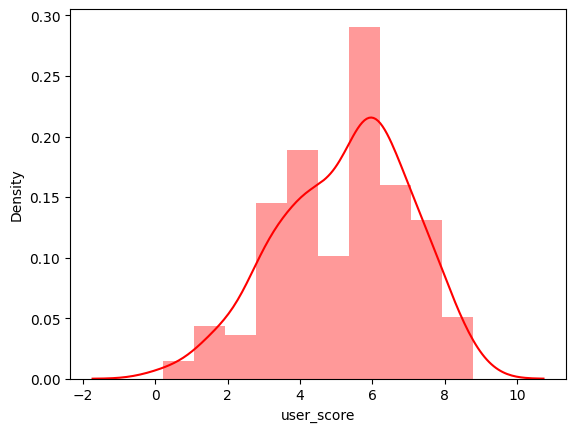

In [80]:
sns.distplot(action, color='g')
plt.show()
sns.distplot(sports, color='r')
plt.show()

/tmp/ipython-input-81-3241525006.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(action, color='g')
/tmp/ipython-input-81-3241525006.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sports, color='r')


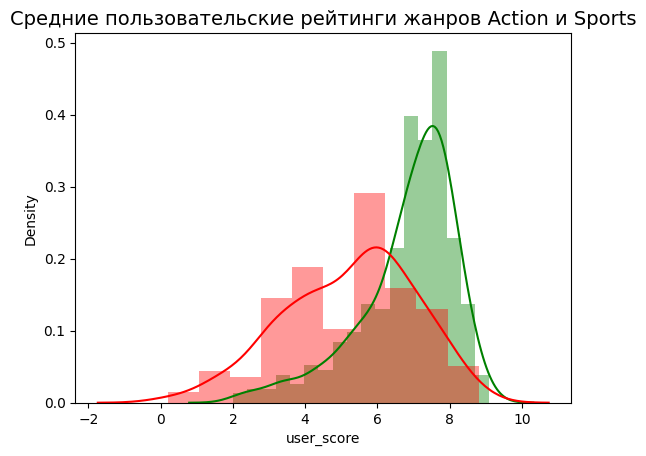

In [81]:
sns.distplot(action, color='g')
sns.distplot(sports, color='r')
plt.title('Средние пользовательские рейтинги жанров Action и Sports', fontsize=14);

In [82]:
results=scipy.stats.ttest_ind(action, sports, equal_var = True)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отклоняем нулевую гипотезу")
else:
    print("Не получилось отклонить нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отклоняем нулевую гипотезу


Статистический анализ пользовательских рейтингов для платформ Xbox и PC подтвердил их различие. Средние пользовательские рейтинги жанров Action и Sports также различны. p-значение (вероятность ошибки при отклонении нулевой гипотезы) в обоих случаях минимально, гистограммы наглядно показали различие пользовательских рейтингов платформ и жанров.

In [83]:
results=scipy.stats.ttest_ind(action, sports, equal_var = True, alternative = 'greater')
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Рейтинги жанра Экшн выше, чем жанра спорт ")
else:
    print("Не получилось отклонить нулевую гипотезу")

p-значение: 5.2589161945700115e-28
Рейтинги жанра Экшн выше, чем жанра спорт 


# <a name="8"> Шаг 5 — Общий вывод</a>

В ходе работы проанализировано 16 715 записей. При этом в колонках Critic_Score данные
заполнены лишь на 49%, а Rating и User_Score - на 60%. Пропущенные значения были
определённым образом обработаны, рад данных приведены в иному, более удобному для
обработки типу, в частности datatime. Также преобразованы названия для удобства
обращения к ним в коде программ. Среди оценок пользователей встречается значение
"tbd". При переводе в числовой тип данные значения преобразовались в пустые.


В ходе анализа мы выяснили, что наиболее перспективными платформами являются **xone**, **wiiu** и **pc**.

**Самые популярные игровые жанры:**

- В европейском регионе: action, sports, misc, racing и shooter;
- В японском регионе: action, adventure, role-playing, misc и fighting;
- В Северной Америке: action, sports, racing, misc и shooter.

**Самые популярные платформы:**

- Для Европейского региона: ds, wii, x360, ps2 и xb;
- Для Северо-Американского региона: ps2, ps, pc, x360 и ps3;
- Для Японского региона: psp, ds, ps2, psv и ps3.

**Проверка гипотез показала:**

- Средние пользовательские рейтинги платформ Xbox One и PC отличаются;
- Средние пользовательские рейтинги жанров Action и Sports разные.

**Рейтинг влияет на продажи**

Основываясь на всем вышеперечисленном, можно сделать вывод: игра имеет больше шансов на успех, если она выходит на **Xbox One** или **PlayStation 4** и новее и относится к жанру **Action**. Именно на этот продукт необходимо делать ставку производителям и продавцам игр в нашей условной ситуации.